In [1]:
!pip install yfinance
!pip install mpl_finance
!pip install bokeh
!pip install seaborn
!pip install pandas_ta
!pip install pandas_bokeh
!pip install python-binance



In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import pandas_bokeh

pandas_bokeh.output_notebook()

import pyarrow.parquet as pq
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Spectral6
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 


Loading BokehJS ...

C:\Users\dung.duong\Anaconda3\envs\dungduong\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
from binance.client import Client
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa

api_key = "zzjxplMhUgyz4Jp1ju8TbAp4mlAAH1HdXnwuNWaHboge5HR6yOOPFKD3x68TR5Iv"
api_secret = "RmBL4M2AJSnzY5Dk4nec0dD0tgD9Eox8vwkqKIyWYkQus7oPhm5a7ilMz2vgMiyP"
client = Client(api_key, api_secret)



In [4]:
# start_date = "1 March, 2021"
# end_date = "30 March, 2021"
# period = Client.KLINE_INTERVAL_4HOUR
# code = "1INCHUSDT"
# data = client.get_historical_klines(code, period, start_date, end_date)
# data = [x[:6] for x in data]

start_date = "100 day ago UTC"
period = Client.KLINE_INTERVAL_1HOUR
# code = "TRBUSDT"
# code = "1INCHUSDT"
# code = "ACMUSDT"
# code = "CHRUSDT"
# code = "DEGOUSDT"
code = "VOXELUSDT"

data = client.get_historical_klines(code, period, start_date)
data = [x[:6] for x in data]

df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index, unit='ms')

df = df[['Open', 'High', 'Low', 'Close','Volume']]
df['Date'] = [mpl_dates.date2num(x) for x in df.index]
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]


In [5]:
# df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
# df.set_index('Date', inplace=True)
# df.index = pd.to_datetime(df.index, unit='ms')

In [6]:
# df = df[['Open', 'High', 'Low', 'Close','Volume']]
# df['Date'] = [mpl_dates.date2num(x) for x in df.index]
# df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
# df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Get technical analysis information

In [7]:
MyStrategy = ta.Strategy(
    name="DCSMA10",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 20},
        {"kind": "sma", "length": 90},
        {"kind": "donchian", "lower_length": 10, "upper_length": 15},
        {"kind": "adx"},
        {"kind": "wma"},
        {"kind": "increasing"},
        {"kind": "long_run"},
        {"kind": "ttm_trend"}
    ]
)

# (2) Run the Strategy
df.ta.strategy(MyStrategy)

In [8]:
df

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_90,DCL_10_15,DCM_10_15,DCU_10_15,ADX_14,DMP_14,DMN_14,WMA_10,INC_1,TTM_TRND_6
Date,,,,,,,,,,,,,,,,,
2022-03-01 08:00:00,1.6434,1.6688,1.6142,1.6665,894252.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
2022-03-01 09:00:00,1.6665,1.6930,1.6500,1.6796,791851.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1
2022-03-01 10:00:00,1.6796,1.6889,1.6500,1.6710,472727.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
2022-03-01 11:00:00,1.6695,1.6720,1.6333,1.6338,510338.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1
2022-03-01 12:00:00,1.6350,1.6627,1.6265,1.6540,499461.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09 03:00:00,0.5158,0.5205,0.5126,0.5189,111202.6,0.51779,0.527870,0.547584,0.5082,0.52860,0.5490,20.510122,14.090761,21.010687,0.516687,1,1
2022-06-09 04:00:00,0.5189,0.5223,0.5176,0.5190,108548.5,0.51769,0.527165,0.547050,0.5082,0.52630,0.5444,20.139657,14.906948,20.302273,0.516907,1,1
2022-06-09 05:00:00,0.5198,0.5212,0.5150,0.5150,132146.2,0.51730,0.526005,0.546522,0.5082,0.52630,0.5444,20.122084,14.225560,21.291115,0.516418,0,-1


In [9]:
df['Date'] = df.index


In [10]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

df.plot_bokeh.line(
    x= 'Date', 
    y=['SMA_10', 'DCL_10_15', 'DCM_10_15'],
    figsize=(900, 500),
    zooming=False,
    panning=False
)

Figure(id='1035', ...)

In [11]:
df.plot_bokeh.line(
    figsize=(800, 450),
    x='Date',
    y=['SMA_10', 'DCL_10_15', 'DCM_10_15'],
    plot_data_points=True,
    plot_data_points_size=1,
    zooming=False,
    marker= 'asterisk')

Figure(id='1328', ...)

In [12]:
df_term = df.copy(deep=True)
df_term['Date'] = [mpl_dates.date2num(x) for x in df_term.index]
df_term = df_term.rename(columns={'open': 'Open', 'close': 'Close', 'volume':'Volume', 'low':'Low', 'high':'High'})
df_term = df_term[['Date','Open', 'High', 'Low', 'Close', 'Volume']]


C:\Users\dung.duong\AppData\Local\Temp\ipykernel_28220\3511969556.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


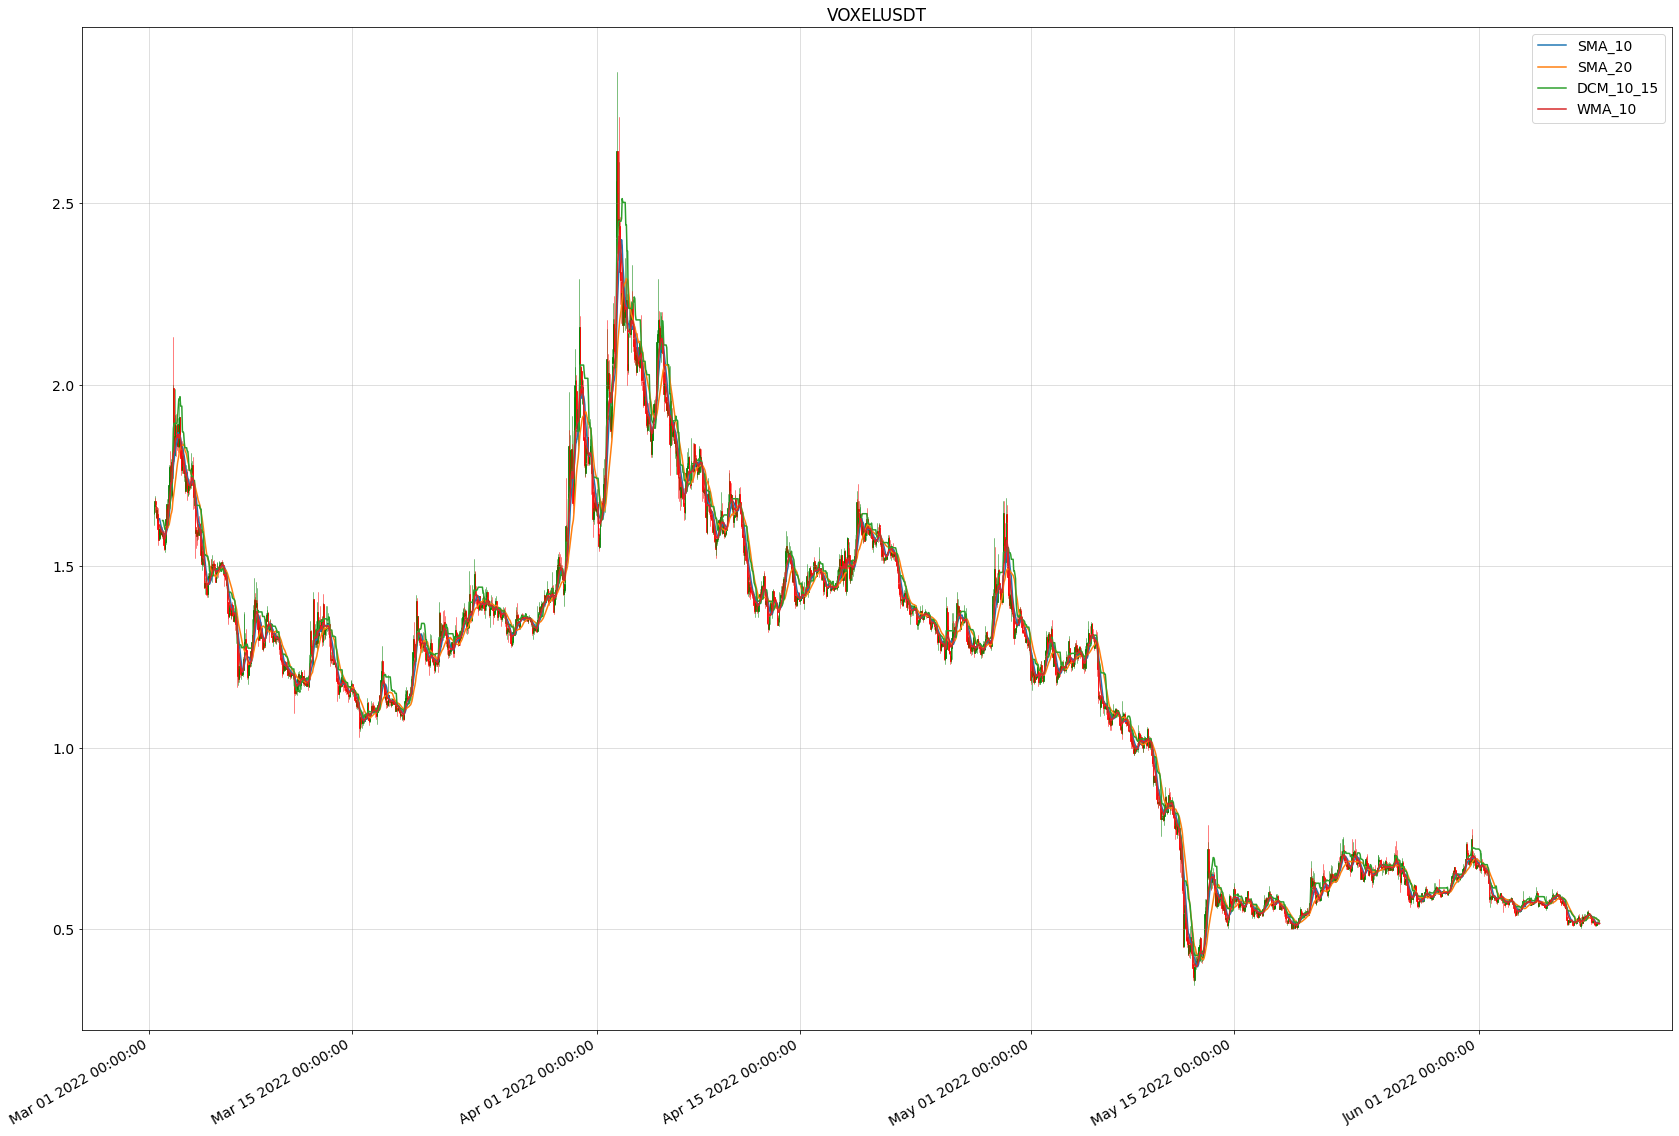

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(28.5, 20.5)

candlestick_ohlc(ax,df_term.values,width=0.04, colorup='green', colordown='red', alpha=0.8)
ax.grid(which='both')
ax.plot(df.index, df['SMA_10'], label='SMA_10')
ax.plot(df.index, df['SMA_20'], label='SMA_20')
ax.plot(df.index, df['DCM_10_15'], label='DCM_10_15')
ax.plot(df.index, df['WMA_10'], label='WMA_10')

date_format = mpl_dates.DateFormatter("%b %d %Y %H:%M:%S")
ax.xaxis.set_major_formatter(date_format)
ax.legend()
ax.title.set_text(code)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
fig.autofmt_xdate()
fig.show()

In [14]:
fig.savefig('output.png', dpi=100)


In [15]:
df

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_90,DCL_10_15,DCM_10_15,DCU_10_15,ADX_14,DMP_14,DMN_14,WMA_10,INC_1,TTM_TRND_6,Date
Date,,,,,,,,,,,,,,,,,,
2022-03-01 08:00:00,1.6434,1.6688,1.6142,1.6665,894252.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 08:00:00
2022-03-01 09:00:00,1.6665,1.6930,1.6500,1.6796,791851.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,2022-03-01 09:00:00
2022-03-01 10:00:00,1.6796,1.6889,1.6500,1.6710,472727.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 10:00:00
2022-03-01 11:00:00,1.6695,1.6720,1.6333,1.6338,510338.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 11:00:00
2022-03-01 12:00:00,1.6350,1.6627,1.6265,1.6540,499461.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,2022-03-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09 03:00:00,0.5158,0.5205,0.5126,0.5189,111202.6,0.51779,0.527870,0.547584,0.5082,0.52860,0.5490,20.510122,14.090761,21.010687,0.516687,1,1,2022-06-09 03:00:00
2022-06-09 04:00:00,0.5189,0.5223,0.5176,0.5190,108548.5,0.51769,0.527165,0.547050,0.5082,0.52630,0.5444,20.139657,14.906948,20.302273,0.516907,1,1,2022-06-09 04:00:00
2022-06-09 05:00:00,0.5198,0.5212,0.5150,0.5150,132146.2,0.51730,0.526005,0.546522,0.5082,0.52630,0.5444,20.122084,14.225560,21.291115,0.516418,0,-1,2022-06-09 05:00:00


# Support & Resistance

In [31]:
s =  np.mean(df['High'] - df['Low'])
def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

# to make sure the new level area does not exist already
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0


In [32]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

In [33]:
# for visualization
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

C:\Users\dung.duong\AppData\Local\Temp\ipykernel_28220\384075186.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


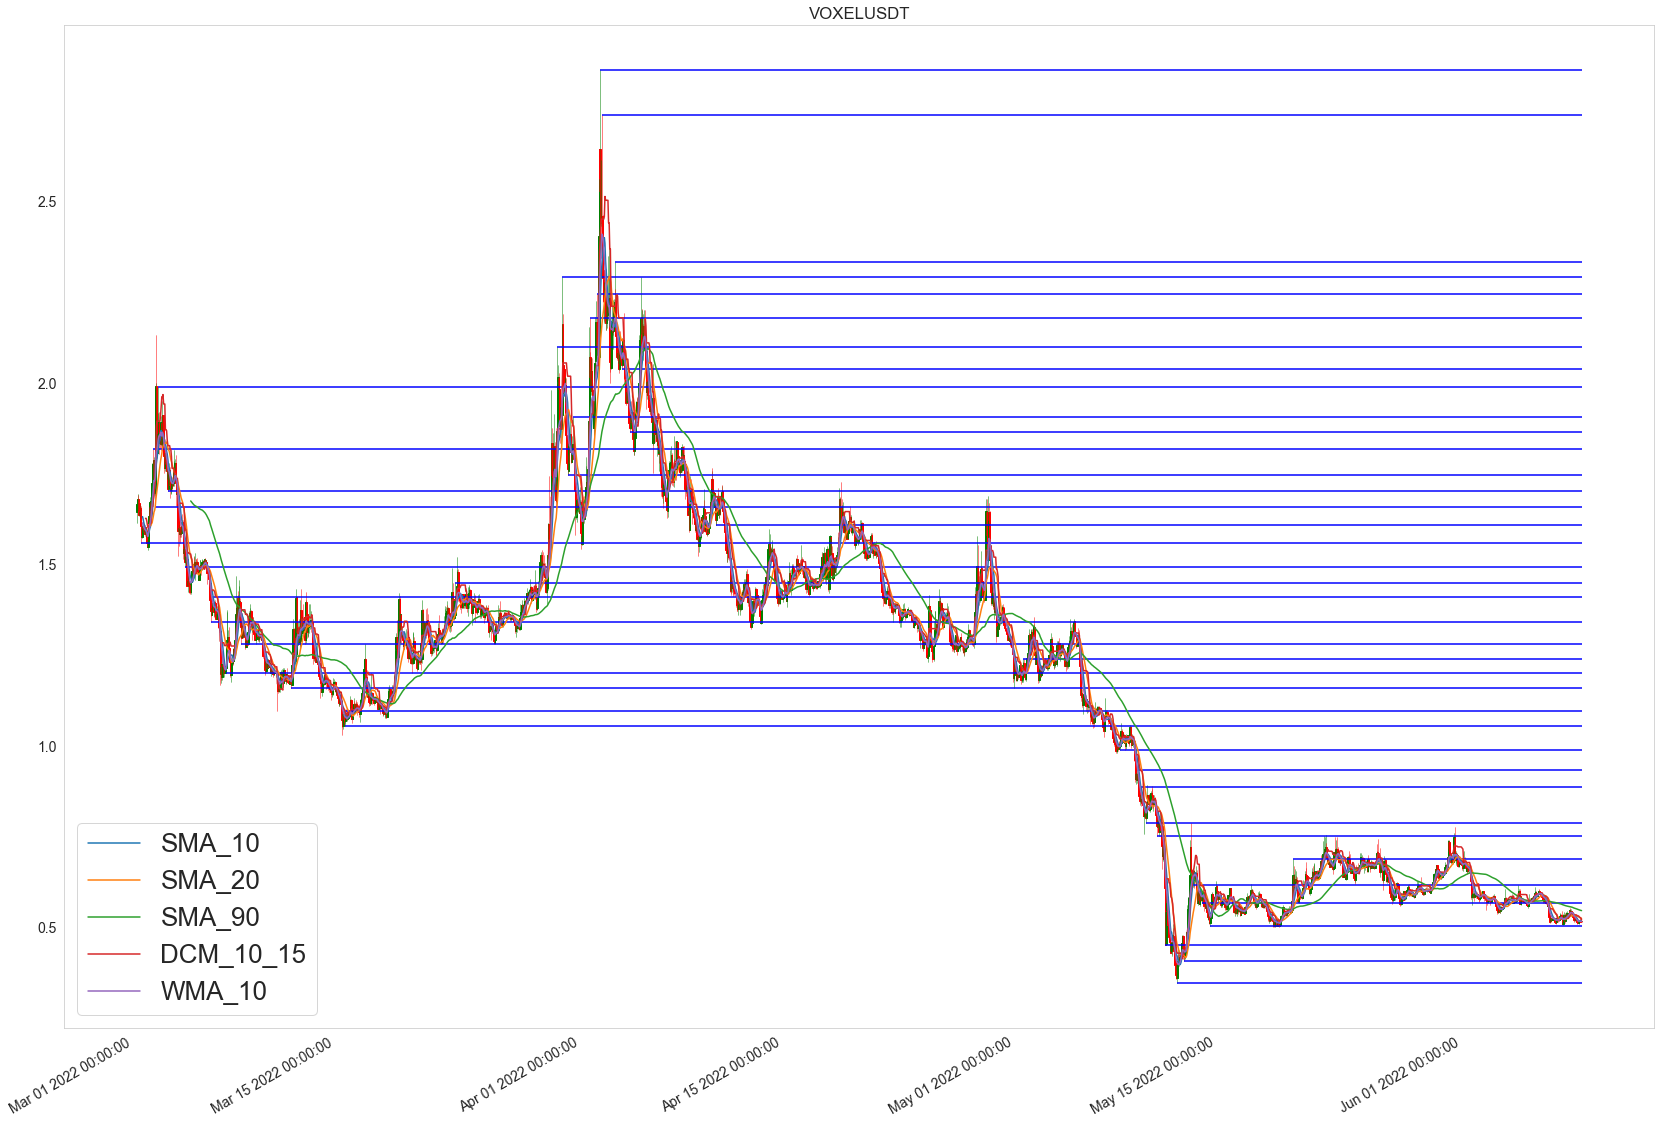

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(28.5, 20.5)
sns.set_style("whitegrid")

# ax.grid(which='major', color='#CCCCCC', linestyle='--')
# ax.grid(which='minor', color='#CCCCCC', linestyle=':')

candlestick_ohlc(ax, df_term.values,width=0.09, colorup='green', colordown='red')

for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]], xmax=max(df['Date']),colors='blue')
    
ax.grid(which='both')
ax.plot(df.index, df['SMA_10'], label='SMA_10')
ax.plot(df.index, df['SMA_20'], label='SMA_20')
ax.plot(df.index, df['SMA_90'], label='SMA_90')
ax.plot(df.index, df['DCM_10_15'], label='DCM_10_15')
ax.plot(df.index, df['WMA_10'], label='WMA_10')

date_format = mpl_dates.DateFormatter("%b %d %Y %H:%M:%S")
ax.xaxis.set_major_formatter(date_format)
ax.legend(loc=3, prop={'size': 26})
ax.title.set_text(code)
# ax.grid(which='both')
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)
# ax.grid(b=True, which='major', color='r', linestyle='-')
# ax.grid(b=True, which='minor', color='r', linestyle='-')
# plt.grid(color='r', linestyle='-', linewidth=0.5, which = 'both')

fig.autofmt_xdate()
fig.show()

In [36]:
df

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_90,DCL_10_15,DCM_10_15,DCU_10_15,ADX_14,DMP_14,DMN_14,WMA_10,INC_1,TTM_TRND_6,Date
Date,,,,,,,,,,,,,,,,,,
2022-03-01 08:00:00,1.6434,1.6688,1.6142,1.6665,894252.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 08:00:00
2022-03-01 09:00:00,1.6665,1.6930,1.6500,1.6796,791851.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,2022-03-01 09:00:00
2022-03-01 10:00:00,1.6796,1.6889,1.6500,1.6710,472727.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 10:00:00
2022-03-01 11:00:00,1.6695,1.6720,1.6333,1.6338,510338.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,2022-03-01 11:00:00
2022-03-01 12:00:00,1.6350,1.6627,1.6265,1.6540,499461.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,2022-03-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09 03:00:00,0.5158,0.5205,0.5126,0.5189,111202.6,0.51779,0.527870,0.547584,0.5082,0.52860,0.5490,20.510122,14.090761,21.010687,0.516687,1,1,2022-06-09 03:00:00
2022-06-09 04:00:00,0.5189,0.5223,0.5176,0.5190,108548.5,0.51769,0.527165,0.547050,0.5082,0.52630,0.5444,20.139657,14.906948,20.302273,0.516907,1,1,2022-06-09 04:00:00
2022-06-09 05:00:00,0.5198,0.5212,0.5150,0.5150,132146.2,0.51730,0.526005,0.546522,0.5082,0.52630,0.5444,20.122084,14.225560,21.291115,0.516418,0,-1,2022-06-09 05:00:00


C:\Users\dung.duong\AppData\Local\Temp\ipykernel_28220\2343771221.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


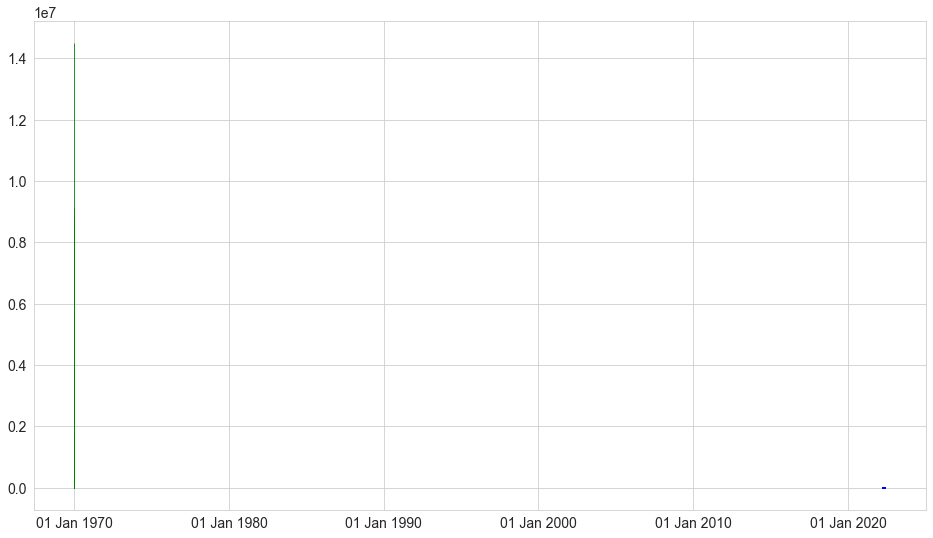

In [35]:
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # taking a window of 9 candles
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # if we find a new maximum value, empty the max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # if the maximum value remains the same after shifting 5 times
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
plot_all(pivots, df)

In [37]:
high_range

Date
2022-06-08 21:00:00    0.5248
2022-06-08 22:00:00    0.5278
2022-06-08 23:00:00    0.5230
2022-06-09 00:00:00    0.5168
2022-06-09 01:00:00    0.5155
2022-06-09 02:00:00    0.5186
2022-06-09 03:00:00    0.5205
2022-06-09 04:00:00    0.5223
2022-06-09 05:00:00    0.5212
Name: High, dtype: float64

In [27]:
# df.head()

In [28]:
# df.shape

# Fibonacci 

In [22]:
highest_swing = -1
lowest_swing = -1

for i in range(1,df.shape[0]-1):
  if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
    highest_swing = i

  if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
    lowest_swing = i

In [23]:
ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []

In [24]:
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]

for ratio in ratios:
  if highest_swing > lowest_swing: # Uptrend
    levels.append(max_level - (max_level-min_level)*ratio)
  else: # Downtrend
    levels.append(min_level + (max_level-min_level)*ratio)

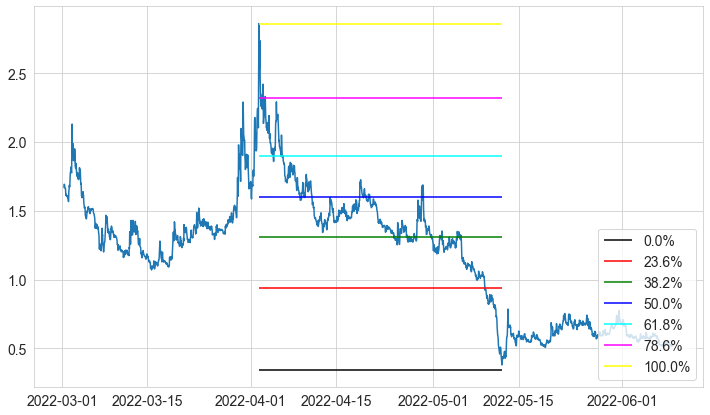

In [25]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['High'])


start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]


for i in range(len(levels)):
  plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="solid")
plt.legend(loc='lower right')
plt.show()